# Lecture 17

In [117]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy import nan as NaN
from IPython.display import Image
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from math import factorial

### Data transformation and normalization
* Use boxplot to take a quick book
* Transform data to obtain a certain distribution 
    * e.g. from lognormal to normal 
    * Normalize data so different columns became comparable / compatible 
* Typical normalization approach: 
    * Z-score transformation 
    * Scale to between 0 and 1 
    * Trimmed mean normalization 
    * Vector length transformation 
    * Quantilenorm

<bound method NDFrame.head of             a         b         c
0    0.871999  1.188369  1.511918
1    0.202313  1.744286  8.305237
2    0.511522  0.242368  0.743033
3    0.203204  1.216701  2.409413
4    0.518978 -0.738690  0.331479
..        ...       ...       ...
995  0.142478 -0.303547  3.035289
996  0.044774 -0.096327  0.154001
997  0.924446  1.583642  1.832716
998  0.090984  1.358933  2.754523
999  0.869680 -0.889112  1.504165

[1000 rows x 3 columns]> 



<AxesSubplot:>

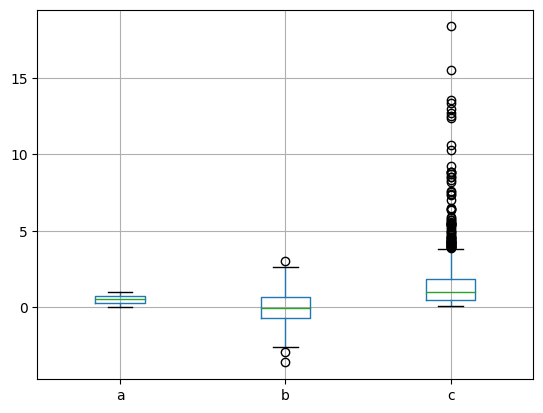

In [118]:
#Boxplot example
df=DataFrame({'a': np.random.rand(1000),
              'b': np.random.randn(1000, ),
              'c': np.random.lognormal(size=(1000,))})
#This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.
print(df.head,"\n") #For negative values of n, this function returns all rows except the last n rows, equivalent to df[:-n]
df.boxplot()

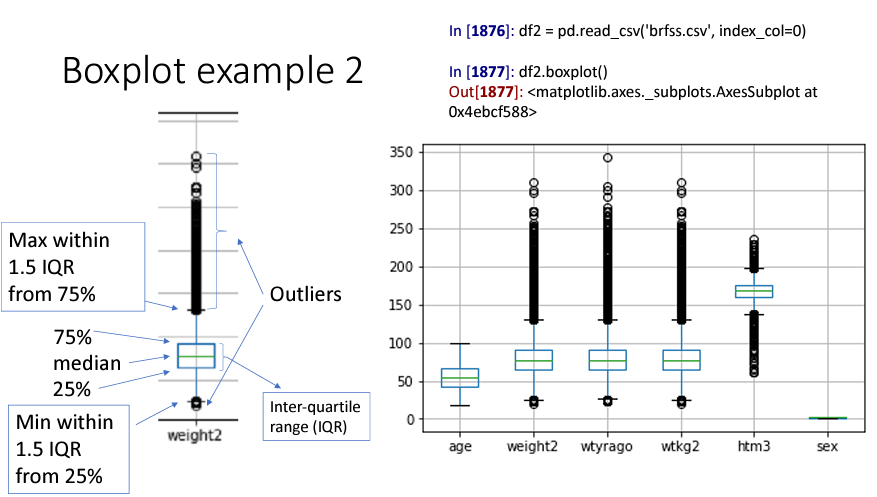

In [119]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\boxplt.png")

### Other useful pandas plotting functions
* hist, plot, scatter, etc.

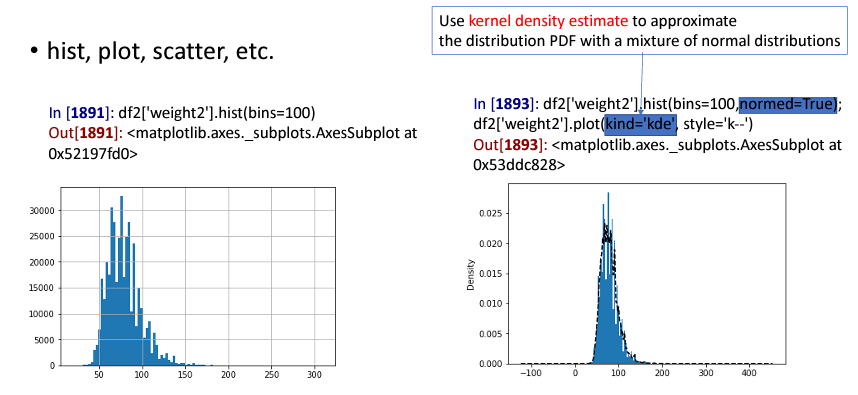

In [120]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\hstbar.png")

<AxesSubplot:>

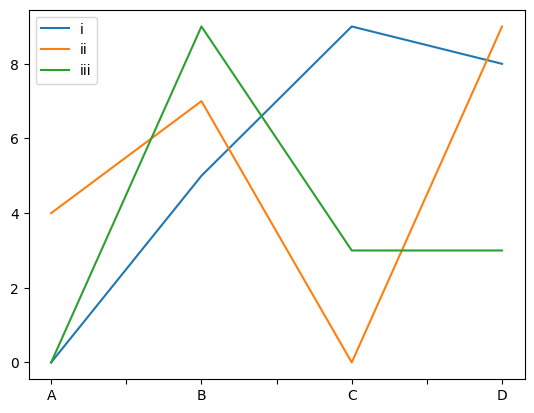

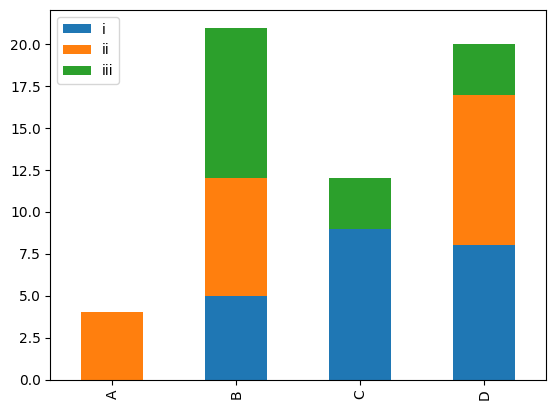

In [121]:
df3 = DataFrame(np.random.randint(0, 10, (4, 3)),
                index=['A', 'B', 'C', 'D'],
                columns=['i', 'ii', 'iii'])
df3.plot()
df3.plot(kind='bar', stacked=True)

<AxesSubplot:>

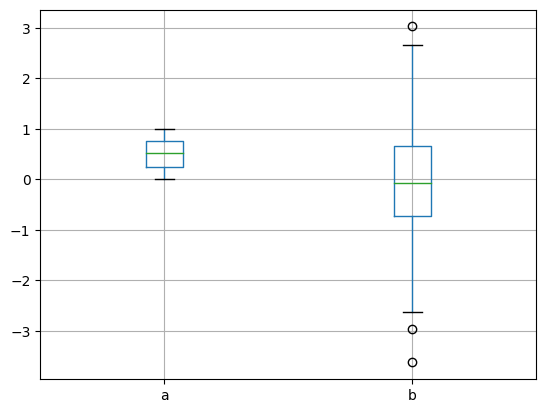

In [122]:
df4 = df.drop('c', axis=1)
df4.boxplot()


<AxesSubplot:>

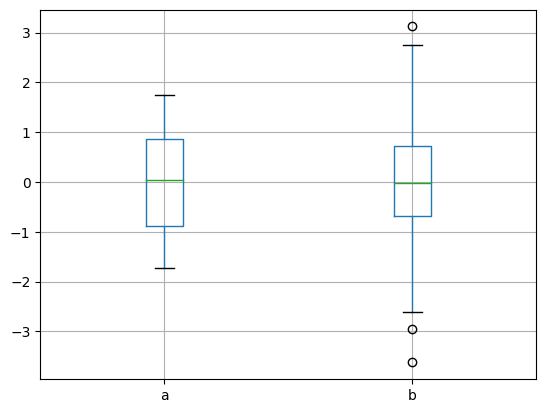

In [123]:

def zscore(series):
    return (series-series.mean(skipna=True)) / series.std(skipna=True)
df5 = df4.apply(zscore)
df5.boxplot()

### Scaling to between 0 and 1

<AxesSubplot:>

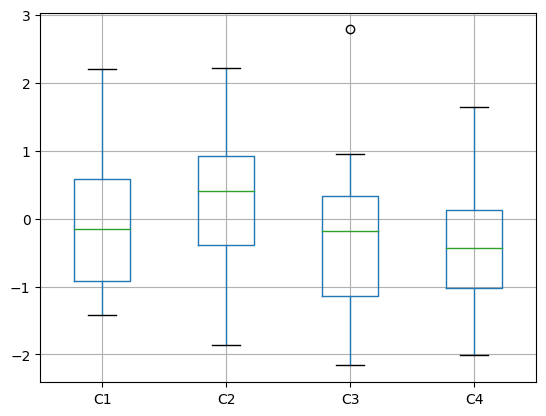

In [124]:
np.random.seed(2345)
df6 = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df6.boxplot(column=['C1', 'C2', 'C3','C4'])

<AxesSubplot:>

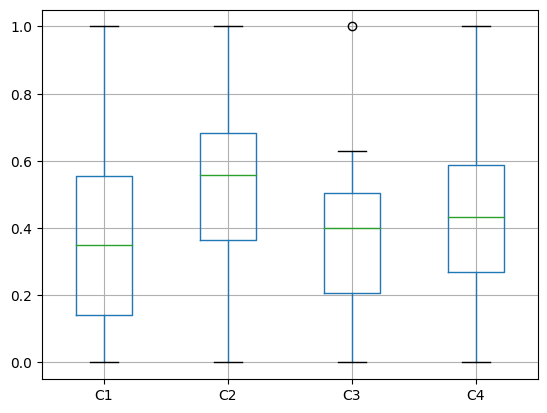

In [125]:
def scaling(series):
    return (series - series.min()) / (series.max() - series.min())
df7 = df6.apply(scaling)
df7.boxplot()

### Mean-based scaling

<AxesSubplot:>

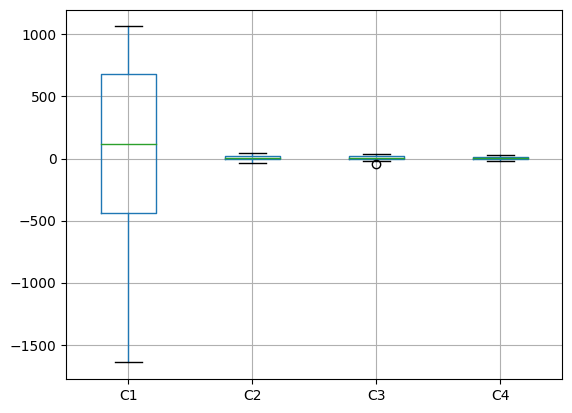

In [126]:
def meanScaling(series):
    return series / series.mean()
df8 = df6.apply(meanScaling) * 5
df8.boxplot()

<AxesSubplot:>

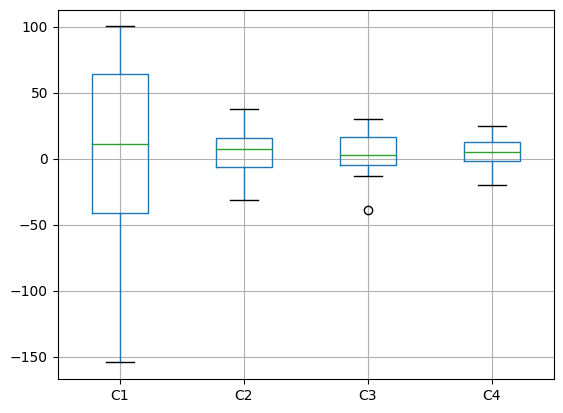

In [127]:
#stats.trim_mean->Mean after removing largest and smallest proportionToCut data
def trimMeanScale(series, proportionToCut=0):
    return series / stats.trim_mean(series.dropna(), proportionToCut)
df8 = df6.apply(trimMeanScale, proportionToCut=0.1)*5
df8.boxplot()

### Transform and normalize

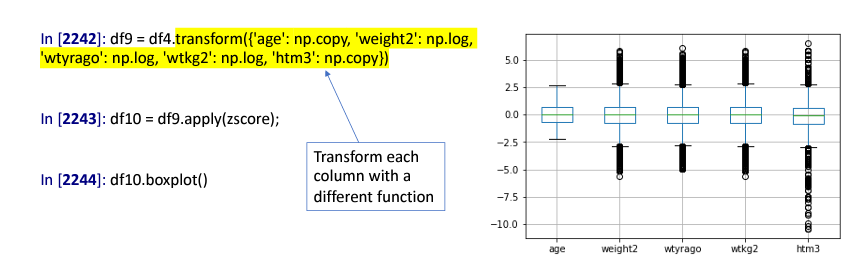

In [128]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\transform.png")

### Machine learning intro
* Regression 
* Classification 
* Clustering 
* Dimension reduction 
* Feature selection

### This topic
* Simple linear regression 
* Multi linear regression 
* Ridge regression 
* Lasso 
* Logistic regression (for classification)

### Recall: Pearson Correlation Coefficient
* a single number that measures both the strength and direction of the linear relationship between two continuous variables
* it has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTmg0dRoJ1DiowlpdYiJy3G3SoMtC1wrFPhMw&usqp=CAU)

### Linear regression
* In correlation, the two variables are treated as equals.  In regression, one variable is considered independent (=predictor) variable (X) and the other the dependent (=outcome) variable Y.
* The output of a regression is a function that predicts the dependent variable based upon values of the independent variables.
* Simple regression fits a straight line to the data.

### What is “Linear”?
* Remember this: 
    * Y=a + βx?
        * A slope of β means that every 1-unit change in X yields a β -unit change in Y.

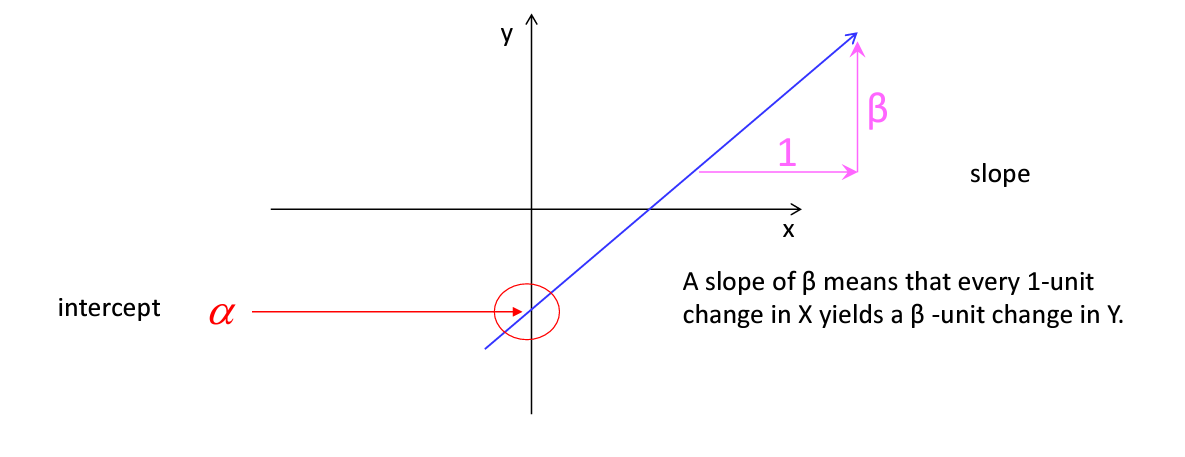

In [129]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\slope.png")

### Prediction
* If you know something about X, this knowledge helps you predict something about Y.  (Sound familiar?…sound like conditional probabilities?)


### Regression equation
* Expected value of y at a given level of x

![](https://www.gstatic.com/education/formulas2/443397389/en/regression_analysis.svg)

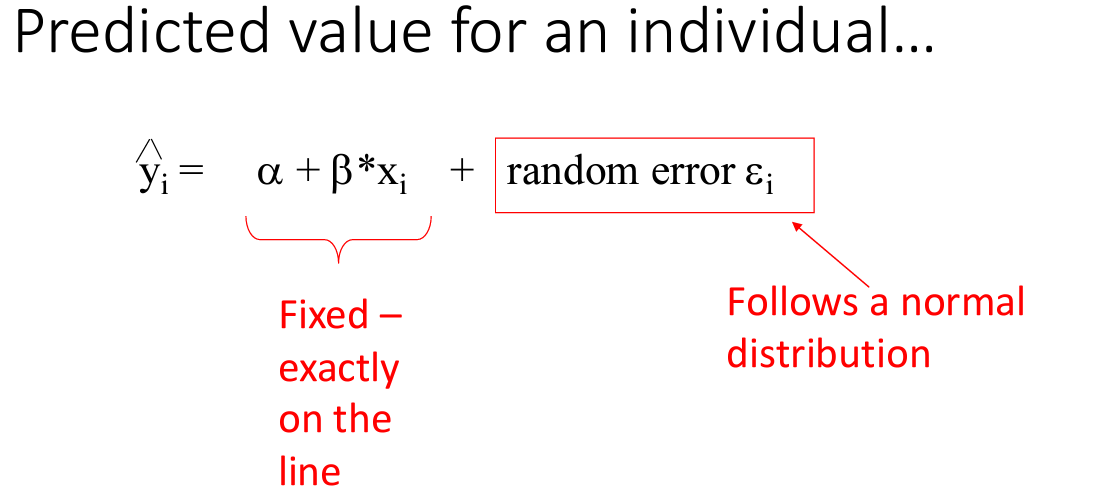

In [130]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\rand.png")

### Simple linear regression
* The function will make a prediction for each observed data point.
 *The observation is denoted by y and the prediction is denoted by ŷ

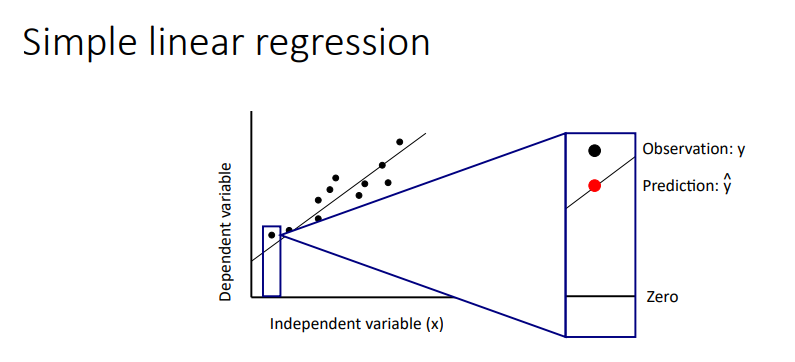

In [131]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\slr.png")

### regression error
* For each observation, the variation can be described as:
    * y = ŷ + ε
        * Actual = Explained + Error


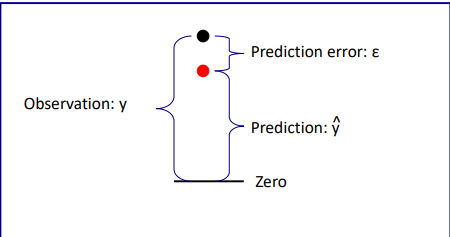

In [132]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\re.png")

### Sum of squares of error (SSE)
* A least squares regression selects the line with the lowest total sum of squared prediction errors.

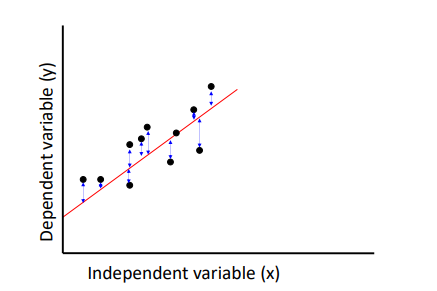

In [133]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\sse.png")

### Sum of squares of regression (SSR)
* The Sum of Squares Regression (SSR) is the sum of the squared differences between the prediction for each observation and the population mean.

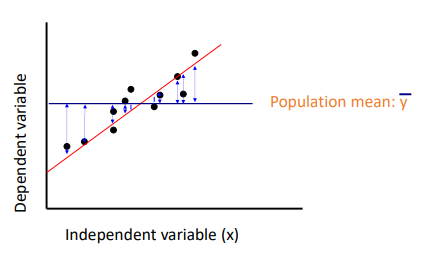

In [134]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\ssr.png")

### SST, SSR and SSE
* The Total Sum of Squares (SST) is equal to SSR + SSE.
    * Mathematically,
       * SSR = ∑ ( ŷ – ȳ )^2 (measure of explained variation)
       * SSE = ∑ ( y – ŷ )^2 (measure of unexplained variation)
       * SST = SSR + SSE = ∑ ( y – ȳ )^2 (measure of total variation in y)

### Least square regression

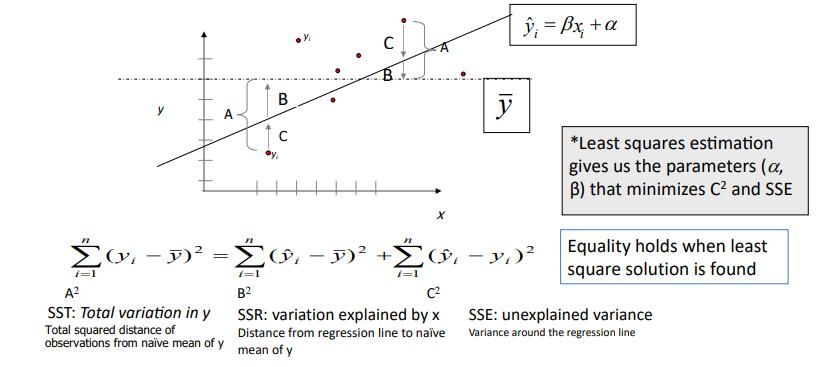

In [135]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\lsr.png")

### The Coefficient of Determination (aka R-squared)
* The proportion of total variation (SST) that is explained by
the regression (SSR) is known as the Coefficient of
Determination and is often referred to as R^2.
    * R^2=B^2/A^2=SSR/SST= 1 – SSE/SST
* The value of R^2 can range between 0 and 1, and the higher
its value the more accurate the regression model is. It is
often referred to as a percentage.

### Solutions for least square fit
* In simple linear regression (single predictor), solutions Y=βx+a? can be calculated easily
* In general, can be solved with
    * Ordinary least squares
    * Optimization algorithms, e.g. gradient descent

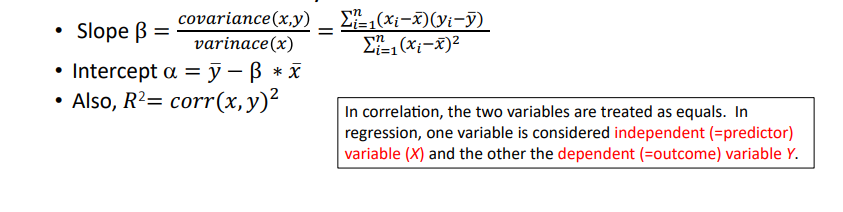

In [136]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\r^2.png")

### Example of least square fit using SSE
* there is a sampled dataset, the "Years of Experience" is the independent variable and the "Salary in hours" is the dependent variable

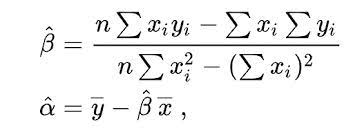

In [137]:
Image(filename=r"C:\Users\rmani\Downloads\sse.jpg")

In [138]:
x = np.array([2,3,5,13,8]) #years of experience
y = np.array([15,28,42,64,50]) #salary in hours

x_mean =np.mean(x)
y_mean =np.mean(y)
n=((x-x.mean()).dot(y-y.mean()))
d=(x-x.mean()).dot(x-x.mean())
beta=n/d
alpha=y_mean-beta*x_mean
print("slope=",beta)
print("intercept=",alpha)

model = LinearRegression()
model.fit(x.reshape(-1,1),y.reshape(-1,1))
print('\nslope =', model.coef_[0][0])
print('intercept =', model.intercept_[0])

print(f"\ny={round(beta,2)}*x+{round(alpha,1)}")


slope= 4.088832487309645
intercept= 14.449238578680198

slope = 4.088832487309645
intercept = 14.449238578680198

y=4.09*x+14.4


* If there are four linear regression
    * y = 5*x + 10
    * y = 3*x + 20
    * y = 3.5*x + 15
    * y = 4*x + 15
* SSE = ∑ ( y - ŷ )^2
    * y is the i-th observation
    * ŷ is the i-th prediction

In [139]:
#y = 5*x + 10
SSE1=((15 - (5*2+10))**2)+((28 - (5*3+10))**2) +((42- (5*5+10))**2) + ((64 - (5*13+10))**2) + ((50 - (5*8+10))**2)
print(f"y = 5*x + 10, SSE={SSE1}")

#y = 3*x + 20
SSE2=((15 - (3*2+20))**2)+((28 - (3*3+20))**2) +((42- (3*5+20))**2) + ((64 - (3*13+20))**2) + ((50 - (3*8+20))**2)
print(f"y = 3*x + 20, SSE={SSE2}")

#y = 3.5*x + 15
SSE3=((15 - (3.5*2+15))**2)+((28 - (3.5*3+15))**2) +((42- (3.5*5+15))**2) + ((64 - (3.5*13+15))**2) + ((50 - (3.5*8+15))**2)
print(f"y = 3.5*x + 15, SSE={SSE3}")

#y = 4*x + 15
SSE4=((15 - (4*2+15))**2)+((28 - (4*3+15))**2) +((42- (4*5+15))**2) + ((64 - (4*13+15))**2) + ((50 - (4*8+15))**2)
print(f"y = 4*x + 15, SSE={SSE4}")

print("A least squares regression selects the line with the lowest total sum of squared prediction errors. thus y = 4*x + 15 is the best linear regression")

y = 5*x + 10, SSE=204
y = 3*x + 20, SSE=232
y = 3.5*x + 15, SSE=206.75
y = 4*x + 15, SSE=132
A least squares regression selects the line with the lowest total sum of squared prediction errors. thus y = 4*x + 15 is the best linear regression


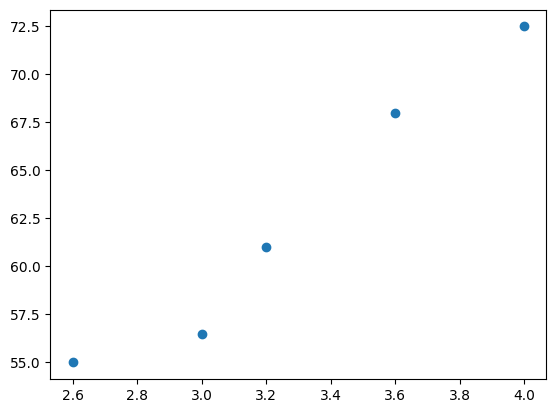

[[13.57876712]]
[18.06164384]


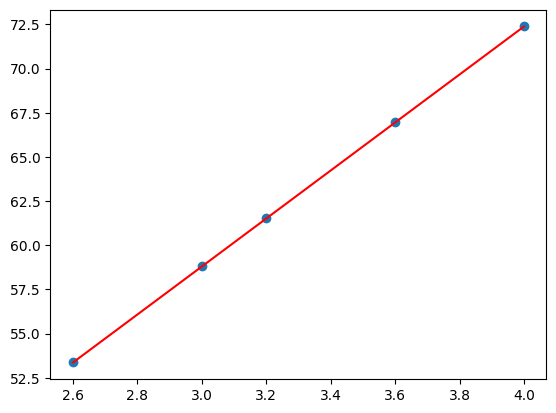

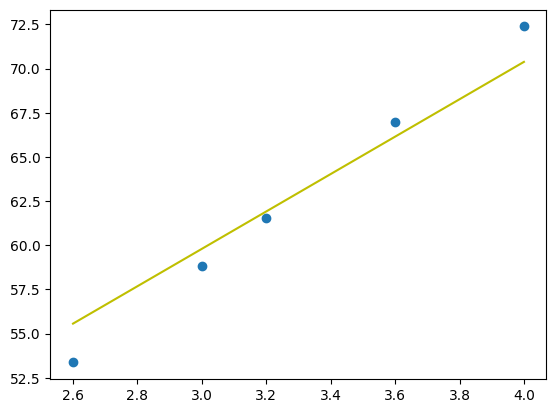

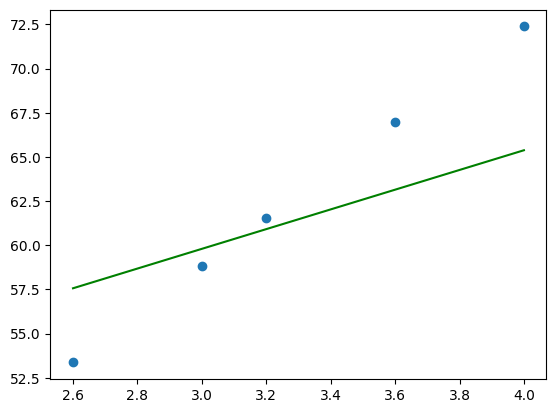

In [140]:
x = np.array([2.6, 3.0, 3.2, 3.6, 4.0])
y = np.array([55, 56.5, 61, 68, 72.5])
plt.scatter(x, y)
plt.show()

model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
print(model.coef_)
print(model.intercept_)
y = 18.06 + 13.58 * x

y_prediction=model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x,y_prediction.reshape(-1, 1),color='r')
plt.show()

y_prediction2=(model.coef_-3)*x+model.intercept_+10
plt.scatter(x, y)
plt.plot(x,y_prediction2.reshape(-1, 1),color='y')
plt.show()

y_prediction3=(model.coef_-8)*x+model.intercept_+25
plt.scatter(x, y)
plt.plot(x,y_prediction3.reshape(-1, 1),color='g')


### Why is Y = 18.06 + 13.58 * X the best?
* The best fit line is the one for which total prediction error (all data points) are as small as possible.
* The error is the mean of square errors
* (MSE or mean of SSE) between the point to the predictions on the regression line.

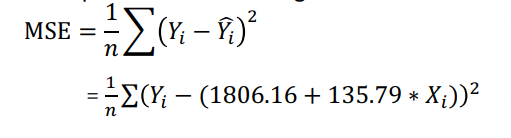

In [141]:
Image(filename=r"C:\Users\rmani\OneDrive\Pictures\mse.png")

intercept= 18.060000000000002
slope= 13.58


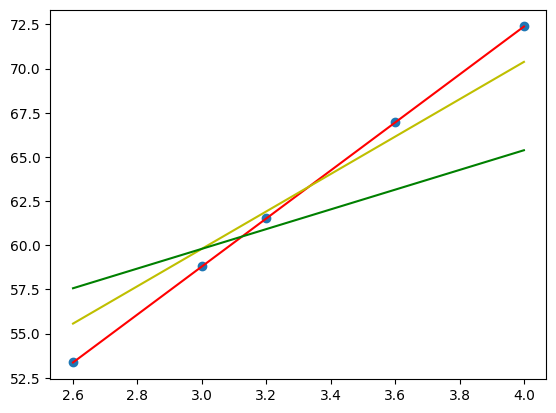

In [142]:
x_mean =np.mean(x)
y_mean =np.mean(y)
(x-x.mean()).dot(y-y.mean())
(x-x.mean()).dot((x-x.mean()))
n=((x-x.mean()).dot(y-y.mean()))
d=(x-x.mean()).dot(x-x.mean())
beta=n/d
alpha=y_mean-beta*x_mean
print("intercept=",alpha)
print("slope=",beta)

plt.scatter(x, y)
plt.plot(x,y_prediction.reshape(-1, 1),color='r')
plt.plot(x,y_prediction2.reshape(-1, 1),color='y')
plt.plot(x,y_prediction3.reshape(-1, 1),color='g')
plt.show()